# 00: Perceptron

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/00-perceptron/00-perceptron-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/00-perceptron/00-perceptron.ipynb)

So let's start now with just building from the ground up the fundamental building block of 
every single neural network and that's going to be just a single neuron and in neural network language a single neuron is called a `perceptron`. 

The perceptron is a simple single layer neural network that takes an input vector $\boldsymbol{x} = [x_1, x_2, ..., x_n]$, multiplies it by a weight vector $\boldsymbol{w} = [w_1, w_2, ..., w_n]$, sums the weighted inputs, and passes the $\sum_i w_ix_i$ added to a bias $w_0$ as $z =  w_0 +  \sum_i w_ix_i$  through an activation function $g(z)$ to produce an output $\hat{y}$:

$$z = \mathrm{bias} + \mathrm{linear\_ combination\_ of \_ inputs}$$
$$z = w_0 + \boldsymbol{w}^T\boldsymbol{x} = w_0 +  \sum_i w_ix_i $$
$$\hat{y} = g(z) $$

The activation function $g$ introduces nonlinearity to allow the perceptron to learn complex mappings from inputs to outputs. Typical choices for $g$ are `sigmoid`, `tanh`, or `ReLU` functions, though the original perceptron used a step function.

The perceptron can be trained via supervised learning, adjusting the weights and biases to minimize the loss between the predicted $\hat{y}$ and the true label $y^{\text{true}}$. Backpropagation combined with gradient descent can be used to iteratively update the weights to reduce the loss.

The key components of a perceptron are:
* Input vector $\boldsymbol{x}$
* Weight vector $\boldsymbol{w}$
* Weighted sum $z = \boldsymbol{w}^T\boldsymbol{x}$
* Nonlinear activation $g$
* Output prediction $\hat{y}$

The perceptron provides a basic model of a neuron, and multilayer perceptrons composed of many interconnected perceptrons can be used to build neural networks with substantial representational power. A perceptron takes a set of inputs, scales them by corresponding weights, sums them together with a bias, applies a non-linear step function, and produces an output. This simple model can represent linear decision boundaries and serves as a building block for more complex neural networks. In training, weights are updated based on the difference between the predicted output and the actual label, often using the Perceptron learning algorithm.


![Perceptron](perceptron.png)

> Credits: Alexander Amini, MIT

## Weights and biases

The weights and biases are the parameters of the perceptron that allow it to learn complex mappings from inputs to outputs.

The weights $w_i$ determine how much influence each input $x_i$ has on the output. Inputs with higher weights have a larger impact. The bias $b$ allows the perceptron to shift the decision boundary away from the origin

The input vector:

$\boldsymbol{x} = [x_1, x_2, ..., x_n]$

The weight vector:

$\boldsymbol{w} = [w_1, w_2, ..., w_n]$

Mathematically, the weighted sum is calculated as:

$z = \boldsymbol{w}^T\boldsymbol{x} = w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$

We then add the bias term $b$ as:

$z = \boldsymbol{w}^T\boldsymbol{x} + b$

Where $z$ is the pre-activation value before applying the nonlinear activation function.

Here is a simple Numpy function that implements a perceptron:

In [1]:
import numpy as np 

# Perceptron function
def perceptron(x, w, b):  
  # Calculate weighted sum
  z = np.dot(x, w) + b 
  return z

x = np.array([-1, 2])      # Example inputs   
w = np.array([3.0, -2.0])  # Example weights 
b = 1.0                    # Example bias    

# Generate prediction
y = perceptron(x, w, b)

# Print prediction
print('Prediction: %.3f' % (y))

Prediction: -6.000


## Nonlinear Activation Function

Activation functions are an important component of artificial neural networks. They introduce non-linearity into the network, allowing it to learn complex patterns in data. Without activation functions, a neural network would essentially be just a linear regression model.

![Why we need activation functions](why-activation.png)
> Credits: Alexander Amini, MIT

Some common activation functions include:

**Sigmoid**

The sigmoid function squashes the input into a range between 0 and 1, and is useful for models where we want to predict a probability as output. A downside is it can saturate and cause vanishing gradients. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

Use Sigmoid for binary classification problems where the output should be a probability between 0-1. Also useful as the output layer for multi-class classification.

**Tanh** 

The tanh function squashes the input into a range between -1 and 1. It is a rescaled version of the sigmoid function. Like sigmoid, it can saturate. 

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

Use `Tanh` for models where you want your outputs centered around 0. Often used in recurrent neural networks.

Here is some Python code to plot these activation functions using numpy and matplotlib:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-x))

# Tanh activation function
tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) 

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, sigmoid, 'r.', label='Sigmoid')
plt.plot(x, tanh, 'b-', label='Tanh')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

**ReLU** The Rectified Linear Unit (ReLU) thresholds the input at zero, returning 0 for negative values and the raw input for positive values. It helps avoid vanishing gradients and is computationally efficient. However, it has a problem with "dying" neurons if inputs are consistently negative. For example, if a neuron in the first layer learns weights that result in a negative input, it will output 0. In backpropagation, since the gradient of the ReLU function is 0 for negative inputs, this neuron will not update its weights. Over time it will not activate on any data and is considered "dead".

This limits the model capacity as neurons can effectively die and remain inactive for the rest of training. LeakyReLU solves this by having a small negative slope (e.g. 0.01x), so even when inputs are negative it will propagate some gradient to update weights.

$$ f(x) = \max(0, x)$$

Use ReLU for hidden layers in networks where your inputs are always positive. It trains faster than sigmoid/tanh.

**LeakyReLU**

The Leaky ReLU introduces a small slope (e.g. 0.01x) for negative values instead of threshholding at zero. This helps solve the "dying neuron" problem of ReLU units. The small negative slope avoids saturation while keeping gradients flowing even for negative regions.

$$f(x) = \max(\alpha x, x)$$

Use LeakyReLU as a general purpose activation function that avoids both saturation and dying neurons.

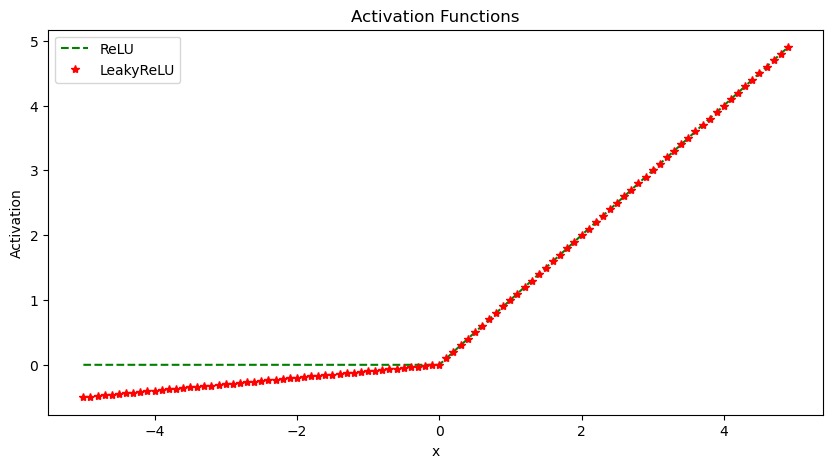

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# ReLU activation function
relu = np.maximum(0, x)

# LeakyReLU activation function
leaky_relu = np.maximum(0.1*x, x)

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, relu, 'g--', label='ReLU')
plt.plot(x, leaky_relu, 'r*', label='LeakyReLU')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

### Single-Layer Neural Network

A single layer neural network, also known as a perceptron, is the simplest type of neural network. It consists of a single layer of input nodes fully connected to a layer of output nodes.
        
Let's now focus on a single neuron $z_2$. Here $z_2$ takes the weighted inputs from $\boldsymbol{x}$ added to the bias term. 
        
$$z_2 = b_2^{(1)} + \sum_{j=1}^m w_{j,2}^{(1)} x_j = b_2^{(1)} + w_{1,2}^{(1)}x_1 + w_{2,2}^{(1)}x_2 + w_{m,2}^{(1)}x_m$$

![Single layer NN](single-layer-nn1.png)

Hidden layers are layers in a neural network that sit between the input layer and the output layer. While the input and output layers connect to the external world, hidden layers only connect to other neurons within the network.

Hidden layers enable neural networks to learn more complex relationships between inputs and outputs. Specifically, hidden layers allow the network to model nonlinear relationships, which is crucial for solving more difficult problems.

The power of deep neural networks comes from having multiple hidden layers. Each layer transforms the representation of the data into a slightly more abstract representation. With enough layers, very complex functions can be modeled.

The number of hidden layers and neurons per layer are part of the neural network architecture. Tuning the hidden layer structure is an important part of applying neural networks to a problem.


We define a hidden layer as: 

$$z_2 = b_i^{(1)} + \sum_{j=1}^m w_{j,i}^{(1)} x_j$$

Final output: 

$$\hat{y}_i = g(b_i^{(2)} + \sum_{j=1}^{d_1} w_{j,i}^{(2)} g(z_j))$$


![Single layer NN](single-layer-nn2.png)

## Training a neural network

Neural networks are trained using an optimization algorithm that iteratively updates the network's weights and biases to minimize a loss function. The loss function measures how far the network's predictions are from the true target outputs in the training data. It is a measure of the model's error.

Some common loss functions include:

* Mean squared error (MSE) - The average of the squared differences between the predicted and actual values. Measures the square of the error. Used for regression problems.

* Cross-entropy loss - Measures the divergence between the predicted class probabilities and the true distribution. Used for classification problems. Penalizes confident incorrect predictions.

* Hinge loss - Used for Support Vector Machines classifiers. Penalizes predictions that are on the wrong side of the decision boundary.

Loss optimization is the process of finding the network weights that acheives the lowest loss.

$$ 
\begin{align}
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}}\frac{1}{n}\sum_{i=1}^n \mathcal{L}(f(x^{(i)};\boldsymbol{w}),y^{(i)})\\
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}} J(\boldsymbol{w})
\end{align}
$$

The training process works like this:

1. **Initialization**: The weights and biases of the network are initialized, often with small random numbers.

2. **Forward Pass**: The input is passed through the network, layer by layer, applying the necessary transformations (e.g., linear combinations of weights and inputs followed by activation functions) until an output is obtained.

3. **Calculate Loss**: A loss function is used to quantify the difference between the predicted output and the actual target values.

4. **Backward Pass (Backpropagation)**: The gradients of the loss with respect to the parameters (weights and biases) are computed using the chain rule for derivatives. This process is known as backpropagation.

5. **Update Parameters**: The gradients computed in the backward pass are used to update the parameters of the network, typically using optimization algorithms like stochastic gradient descent (SGD) or more sophisticated ones like Adam. The update is done in the direction that minimizes the loss.

6. **Repeat**: Steps 2-5 are repeated using the next batch of data until a stopping criterion is met, such as a set number of epochs (full passes through the training dataset) or convergence to a minimum loss value.

7. **Validation**: The model is evaluated on a separate validation set to assess its generalization to unseen data.

### Gradient Descent
Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a differentiable function. In the context of training a neural network, we are trying to minimize the loss function. 

1. **Initialize Parameters**:

Choose an initial point (i.e., initial values for the weights and biases) in the parameter space, and set a learning rate that determines the step size in each iteration.

2. **Compute the Gradient**:

Calculate the gradient of the loss function with respect to the parameters at the current point. The gradient is a vector that points in the direction of the steepest increase of the function. It is obtained by taking the partial derivatives of the loss function with respect to each parameter.

3. **Update Parameters**:

Move in the opposite direction of the gradient by a distance proportional to the learning rate. This is done by subtracting the gradient times the learning rate from the current parameters:

$$\boldsymbol{w} = \boldsymbol{w} - \eta \nabla J(\boldsymbol{w})$$

Here, $\boldsymbol{w}$ represents the parameters, $\eta$ is the learning rate, and $\nabla J (\boldsymbol{w})$ is the gradient of the loss function $J$ with respect to $\boldsymbol{w}$.

4. **Repeat**:

Repeat steps 2 and 3 until the change in the loss function falls below a predefined threshold, or a maximum number of iterations is reached.

#### Algorithm:

1. Initialize weights randomly $\sim \mathcal{N}(0, \sigma^2)$
2. Loop until convergence
3.   Compute gradient, $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
4.   Update weights, $\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
5. Return weights

![SGD](sgd.gif)

Assuming a loss function is mean squared error (MSE). Let's compute the gradient of the loss with respect to the input weights. 

The loss function is mean squared error:

$$\text{loss} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Where $y_i$ are the true target and $\hat{y}_i$ are the predicted values.

To minimize this loss, we need to compute the gradients with respect to the weights $\mathbf{w}$ and bias $b$:

Using the chain rule, the gradient of the loss with respect to the weights is:
$$\frac{\partial \text{loss}}{\partial \mathbf{w}} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i) \frac{\partial y_i}{\partial \mathbf{w}}$$

The term inside the sum is the gradient of the loss with respect to the output $y_i$, which we called $\text{grad\_output}$:
$$\text{grad\_output} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$$

The derivative $\frac{\partial y_i}{\partial \mathbf{w}}$ is just the input $\mathbf{x}_i$ multiplied by the derivative of the activation. For simplicity, let's assume linear activation, so this is just $\mathbf{x}_i$:

$$\therefore \frac{\partial \text{loss}}{\partial \mathbf{w}} = \mathbf{X}^T\text{grad\_output}$$

The gradient for the bias is simpler:
$$\frac{\partial \text{loss}}{\partial b} = \sum_{i=1}^{n}\text{grad\_output}_i$$

Finally, we update the weights and bias by gradient descent:

$$\mathbf{w} = \mathbf{w} - \eta \frac{\partial \text{loss}}{\partial \mathbf{w}}$$

$$b = b - \eta \frac{\partial \text{loss}}{\partial b}$$

Where $\eta$ is the learning rate.


```python
# training the neural network with gradient-based optimization
epochs = 1000       # Number of iterations
learning_rate = 0.1 # eta

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = bingham_nn(v_values, weights, bias)
    # Compute loss as MSE
    loss = ((y_pred - y_true) ** 2).mean()
    
    # Compute gradients
    grad_output = 2 * (y_pred - y_true) / num_samples
    grad_weights = np.dot(v_values.T, grad_output)
    grad_bias = grad_output.sum()

    # Update weights using gradient descent
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias
```

#### Variants:

There are several variants of Gradient Descent that modify or enhance these basic steps, including:

- **Stochastic Gradient Descent (SGD)**: Instead of using the entire dataset to compute the gradient, SGD uses a single random data point (or small batch) at each iteration. This adds noise to the gradient but often speeds up convergence and can escape local minima.

- **Momentum**: Momentum methods use a moving average of past gradients to dampen oscillations and accelerate convergence, especially in cases where the loss surface has steep valleys.

- **Adaptive Learning Rate Methods**: Techniques like Adagrad, RMSprop, and Adam adjust the learning rate individually for each parameter, often leading to faster convergence.

#### Limitations:

* It may converge to a local minimum instead of a global minimum if the loss surface is not convex.
* Convergence can be slow if the learning rate is not properly tuned.
* Sensitive to the scaling of features; poorly scaled data can cause the gradient descent to take a long time to converge or even diverge.


### PyTorch version of Bingham Model

PyTorch is a popular open source machine learning library for Python developed by Facebook. It is used for building and training deep neural networks. Here is how to construct a simple neural network with PyTorch:

First, import PyTorch:

```python
import torch
import torch.nn as nn
import torch.nn.functional as F
```

Define the neural network class inheriting from `nn.Module`. In the constructor initialize the layers:

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1, 1) 
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc(x))
        return x
```

Alternatively, we can also define a new network using a single equivalent line as:

```python
Net = nn.Sequential(nn.Linear(1, 1), nn.ReLU())
```

This creates a simple neural net with 1 fully connected layer and a non-linear activation function ReLU.

Then create the model instance and set the loss function and optimizer:

```python
model = Net()
criterion = nn.MSE()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```

That's it! We now have a simple single layer neural network defined in PyTorch. To train it on data we need to loop through datasets, perform forward passes, compute loss, backpropagate and update weights.

## Neural Network Example

> Deflection of a cantilever beam

In [3]:
import torch
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed_all(42)  # For GPU computation
torch.backends.cudnn.deterministic = True  # Disable cuDNN's heuristics for convolutions

# Parameters
P = 1000  # Load (N)
L = 5     # Beam length (m)
E = 200e9 # Young's modulus (Pa)
I = 1e-5  # Moment of inertia (m^4)

# Generate data
x = torch.linspace(0, L, 100)  # Distance from fixed end
y_true = -(P * x**2) / (6 * E * I) * (3 * L - x)  # True deflection
y_noisy = y_true + 1e-3 * torch.randn(100)  # Add noise

In [6]:
# PyTorch model
X = x.unsqueeze(1)  # Add batch dimension

nparams = 16
model = torch.nn.Sequential(
    torch.nn.Linear(1, nparams),
    torch.nn.Tanh(),
    torch.nn.Linear(nparams, nparams),
    torch.nn.Tanh(),
    torch.nn.Linear(nparams, 1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Tanh()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

Epoch 0, Loss: 8.65e-07
Epoch 500, Loss: 8.49e-07
Epoch 1000, Loss: 8.46e-07


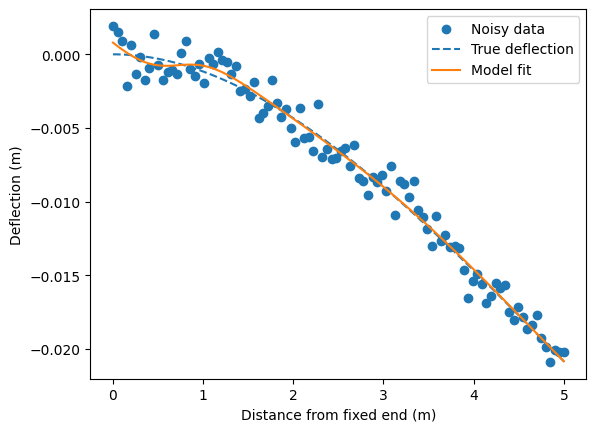

In [22]:
# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1500):
    y_pred = model(X)
    loss = criterion(y_pred, y_noisy.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.2e}')

# Plot data and model fit
import matplotlib.pyplot as plt

y_pred = model(X).detach().numpy()
plt.scatter(x, y_noisy, label='Noisy data')
plt.plot(x, y_true.numpy(), '--', label='True deflection')
plt.plot(x, y_pred, label='Model fit')
plt.xlabel('Distance from fixed end (m)')
plt.ylabel('Deflection (m)')
plt.legend()
plt.show()

Epoch 0, Loss: 8.70e-07
Epoch 500, Loss: 8.71e-07
Epoch 1000, Loss: 8.68e-07


Text(0.5, 1.0, 'Loss Evolution')

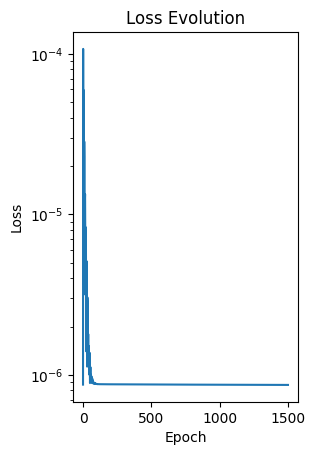

In [20]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# physics loss function
def physics_loss(y_pred, y_noisy):
    y_pred = y_pred.squeeze()
    y_noisy = y_noisy.squeeze()
    
    # Weight
    alpha = 10
    
    # Data loss
    data_loss = torch.mean((y_pred - y_noisy)**2)

    # Physics loss (enforce zero deflection at x=0)
    boundary_loss = y_pred[0]**2

    return data_loss + boundary_loss * alpha

losses = []
# Training loop
for epoch in range(1500):
    y_pred = model(X)
    loss = physics_loss(y_pred, y_noisy.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.2e}')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# set y-axis to log scale
plt.yscale('log')
plt.title('Loss Evolution')

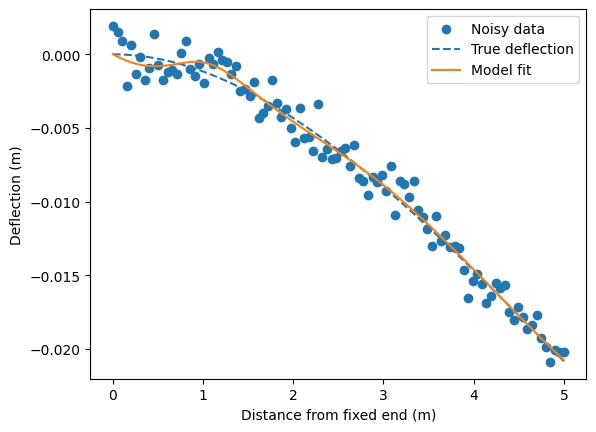

In [21]:

# Plot data and model fit
import matplotlib.pyplot as plt

y_pred = model(X).detach().numpy()
plt.scatter(x, y_noisy, label='Noisy data')
plt.plot(x, y_true.numpy(), '--', label='True deflection')
plt.plot(x, y_pred, label='Model fit')
plt.xlabel('Distance from fixed end (m)')
plt.ylabel('Deflection (m)')
plt.legend()
plt.show()

Hyperparameters are values that we set before beginning the training process. They guide the learning process and differ from model parameters, which are learned from the training data. Below are some key hyperparameters:

1. **Learning Rate**: This hyperparameter controls the step size when updating the model's weights. If you set it too low, the model converges slowly. If you set it too high, the learning process might diverge.

1. **Batch Size**: This defines the number of training examples you use in one iteration to update the model's weights. A smaller batch size typically leads to a regularizing effect and lower generalization error, while a larger batch size results in faster training but may converge to a suboptimal solution.

1. **Number of Epochs**: You set the number of epochs to define how many times the learning algorithm will work through the entire training dataset. An epoch is a full pass through all training samples.

1. **Regularization Parameters**: If you apply regularization techniques like L1 or L2, you must set the strength of the penalty as a hyperparameter. Regularization adds penalties to the model parameters to prevent overfitting.

1. **Optimization Algorithm**: You choose the optimization algorithm (e.g., SGD, Adam, RMSProp) and its specific parameters (e.g., momentum) as hyperparameters.

1. **Network Architecture**: The structure of the neural network, including the number of hidden layers, the number of units in each layer, the activation functions, etc., is determined by hyperparameters that you set.

1. **Initialization**: You decide how to set the model's weights before training, significantly affecting learning. Choices like Xavier or He initialization have corresponding hyperparameters you must set.

1. **Early Stopping**: You can also set parameters related to when to stop training, such as if the validation error stops improving. These choices are considered hyperparameters.

Hyperparameters play a vital role in the behavior and performance of a learning algorithm. Finding the best set of hyperparameters, a process called hyperparameter tuning or optimization is essential in training an effective model. Methods for hyperparameter tuning include grid search, random search, Bayesian optimization, and others.

> 💡 Try to change the hyperparameters (learning rate, number of layers in the neural network and activation function) to reduce the error.

> 📖 Reading Activity: [Do ML models memorize or generalize?](https://pair.withgoogle.com/explorables/grokking/)